In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
from scipy.stats import skew
from sklearn.linear_model import LinearRegression


In [ ]:
abalone = pd.read_csv('/content/abalone.csv') #I use pandas to import the CSV file 
abalone.head(5) #Display the first 5 rows of the dataset

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [ ]:
#The above dataset from the CSV doesnt have a header, so I will need to add the column headers from the "Description file"to better understand the dataset
column_names = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings'] #coulumns header for the dataset
abalone = pd.read_csv('/content/abalone.csv', names = column_names) #Import the CSV file with the dataset combined with the column headers
abalone.head(5) #Display the first 5 rows of the dataset for sanity check

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Question 1 - Description of the dataset assigned to the student.

**a. How many features does the dataset have? Is there a target variable? Explain and show code.**

In [ ]:
abalone.shape #Display the number of rows and columns of this data set

(4177, 9)

In [ ]:
abalone.columns #Display the features of this dataset

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'rings'],
      dtype='object')

This dataset has 9 features - Sex, Length, Diameter, Height, Whole height, Shucked weight, Viscera weight, Shell weight and Rings.



In [ ]:
abalone['age'] = abalone['rings']+1.5 #This code will change the variable rings to age in the data frame
abalone.drop('rings', axis = 1, inplace = True) #This code will drop the column 'rings' from the database
abalone.dtypes

sex                object
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
age               float64
dtype: object

## Question 2. Data quality and data cleansing.

a. Are there missing values in the data? Explain the most common techniques used to deal with missing values in a dataset. Show how you would perform this analysis in Python.

In [ ]:
abalone.isnull().sum(axis = 0) #This code returns the Null values in this DataFrame.

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
age               0
dtype: int64

In [ ]:

abalone.describe() #This code returns the description of the numerical data in this DataFrame.

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


**Data Modeling**

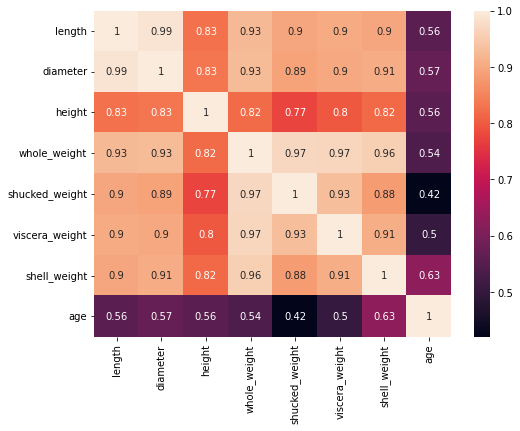

In [ ]:
plt.figure(figsize = (8,6))
corr = abalone.corr()
sns.heatmap(corr, annot = True)
#displays heatmap to visualize the correlation

In [ ]:
abalone.corr() #this code is to check for correlation in the dataframe

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age
length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
age,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


ANALYSIS

-No Negative correlation found

-High coorelation between Length & Diameter

-High corelation between shucked weight, viscera weight Vs Whole_weight & Shell weight vs Whole_weight

In [ ]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
columns_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)] #highly correlated variables to be removed.

print("Columns to drop:\n", columns_to_drop)

Columns to drop:
 ['diameter', 'shucked_weight', 'viscera_weight', 'shell_weight']


Remove those columns from our dataset

In [ ]:
abalone.drop(columns_to_drop, axis=1, inplace = True)


In [ ]:
abalone.head()

,sex,length,height,whole_weight,age
0,M,0.455,0.095,0.5140,16.5
1,M,0.350,0.090,0.2255,8.5
2,F,0.530,0.135,0.6770,10.5
3,M,0.440,0.125,0.5160,11.5
4,I,0.330,0.080,0.2050,8.5


Before applying the machine learning model we need to make sure that all the values are numerical.

In [ ]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sex           4177 non-null   object 
 1   length        4177 non-null   float64
 2   height        4177 non-null   float64
 3   whole_weight  4177 non-null   float64
 4   age           4177 non-null   float64
dtypes: float64(4), object(1)
memory usage: 163.3+ KB


In [ ]:
abalone["sex"].value_counts()


M    1528
I    1342
F    1307
Name: sex, dtype: int64

In [ ]:
abalone["sex"] = abalone["sex"].astype("category").cat.as_ordered()


In [ ]:
abalone.dtypes

sex             category
length           float64
height           float64
whole_weight     float64
age              float64
dtype: object

Turning categorical data to numerical is by using label encoding from scikit-learn library.

In [ ]:
# import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# instantiate LabelEncoder
l_encoder = LabelEncoder()

# transform data
abalone["sex"] =  l_encoder.fit_transform(abalone["sex"])

In [ ]:
abalone

,sex,length,height,whole_weight,age
0,2,0.455,0.095,0.5140,16.5
1,2,0.350,0.090,0.2255,8.5
2,0,0.530,0.135,0.6770,10.5
3,2,0.440,0.125,0.5160,11.5
4,1,0.330,0.080,0.2050,8.5
...,...,...,...,...,...
4172,0,0.565,0.165,0.8870,12.5
4173,2,0.590,0.135,0.9660,11.5
4174,2,0.600,0.205,1.1760,10.5
4175,0,0.625,0.150,1.0945,11.5


## Question 4. Data analysis.

Once you have identified the type of problem you have, define the Python code to analyse the data. Explain the result.



=>In our case, the problem could be used in different ways. As a supervised ( classification or regression) or unsupervised learning

But since we have defined our own target which is "Age" in this case we are facing a supervised learing problem and for this case I will apply it in two different ways ( regression and classification ) depending on our use case. 

There are two main problems that Supervised machine learning algorithms can solve: classification and regression.

Classification models help us categorize and classify data and determine whether or not it belongs to a category or a class.
For example, if we predict the age as our target it should be divided to different classes and then we predict to which class it belongs. We will explain in detail how we define classes when we apply ML model for classification problem.

Regression models help us predict a continious value ( time/ number/ price..)
For example a prediction of a sales amount or, in our case, the age of the abalone shellfish.

Steps to follow when when applying ML to our model for supervised learning problem ( classification or regression):

Split data into x (features) and y (target).

X refers to all the variables that the machine model uses to make a prediction. In our case, the X features include gender, length, diameter, height, etc. 

Y, on the other hand, refers to a target variable or the correct answer. 

In our case, what the machine should predict =>is "age".

Split data into tests and train sets

Basically we train the model on about 80% of the data, and then we see how well it can predict the target variable (age) on the remaining 20% of the data. 

To split the data, we use a scikit-learn's train_test_split module.



- **Supervised problem (regression)**: using linear regression and polynomial regression, explain their performance.

In this part we will start by applying the steps of ML as a regression problem.

In [ ]:
# import regression packages: 

from sklearn import linear_model
from sklearn.model_selection import KFold

In [ ]:
abalone.columns

Index(['sex', 'length', 'height', 'whole_weight', 'age'], dtype='object')

**Linear regression**


A linear regression model for the abalones would predict the age in an abalone shell as a linear function of the abalone's various physical measurements. 

Building a linear regression model is a good first step because it is one of the simplest models. Once we develop the model, we can determine how good a job it does, and whether we need a more sophisticated model.

The labels we'll be fitting the model to are the quantitative labels that are provided in the data set, while the system response being predicted is the the age

**Method1**

In [ ]:
# x data labels

xlabs = ['sex','length','height','whole_weight']
# y data labels
ylabs = ['age']

In [ ]:
lmreg = linear_model.LinearRegression( fit_intercept = False )
lmreg.fit( abalone[xlabs], abalone[ylabs] )

LinearRegression(fit_intercept=False)

In [ ]:
lmreg.coef_


array([[ 0.09831304, 17.7231341 , 26.35050081, -2.0560245 ]])

In [ ]:
lmreg.score(abalone[xlabs],abalone[ylabs])


0.31014289132698825

Doesn't look a great model to use for the moment

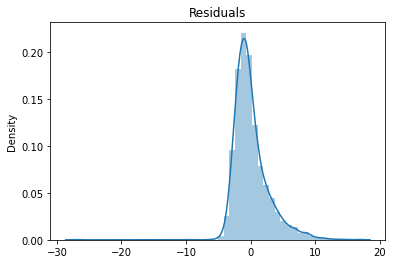

In [ ]:
# Compute residuals 
yhat = lmreg.predict(abalone[xlabs])
lmresid = abalone[ylabs] - yhat
sns.distplot(lmresid)
plt.title('Residuals')

plt.show()

Distribution of residual values shows they follow a (mostly) normal distribution, centered at zero. This is an indication that we have picked good variables to start with.

Some asymmetry in the distribution, indicating larger positive residuals and small negative residuals are more likely (meaning, we will underpredict by a lot infrequently, and overpredict by a little more frequently.)


**Linear Regression Residuals:**
We can use a quantile plot of the residuals to figure out how they are distributed.



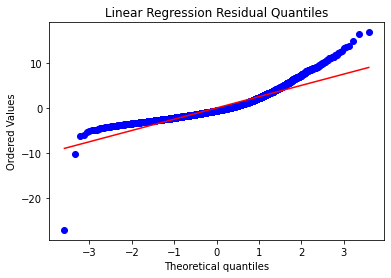

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(111)

stats.probplot(lmresid['age'].values, dist='norm',plot=ax1)
ax1.set_title('Linear Regression Residual Quantiles')
plt.show()

This figure shows that the model residuals are not normally distributed - indicating there are higher order effects that the linear model is not capturing. This is an indication that a linear model just won't cut it.

**Method2**

In [ ]:
abalone.columns

Index(['sex', 'length', 'height', 'whole_weight', 'age'], dtype='object')

In [ ]:
X = np.array([abalone.sex, abalone.length, abalone.height,abalone.whole_weight]) # all features except the target 
Y = np.array(abalone['age'].values.tolist()) #target

In [ ]:
X.shape

(4177, 4)

In [ ]:
X = X.transpose() #X and Y should have the same length we can use either transpose or reshape(-1,1)

In [ ]:
Y.shape

(4177,)

In [ ]:
X.shape[0] == Y.shape[0] # making sure that X and Y have the same lenght

True

In [ ]:
linreg = LinearRegression() # applying our linear regression model
linreg.fit(X,Y)

LinearRegression()

In [ ]:
y_pred = linreg.predict(X)

In [ ]:
y_pred # this returns the prediction result of our model

array([ 9.77540798,  8.82966022, 11.35308208, ..., 13.54315601,
       12.51592698, 14.39395777])

In [ ]:
df=pd.DataFrame(y_pred,columns=['linear regression prediction']) # return the list to a dataframe then we append both results 
# to compare

In [ ]:
df

,linear regression prediction
0,9.775408
1,8.829660
2,11.353082
3,10.358173
4,8.504885
...,...
4172,12.363074
4173,11.790896
4174,13.543156
4175,12.515927


In [ ]:
df_reg=pd.concat([abalone,df],axis=1)
df_reg

,sex,length,height,whole_weight,age,linear regression prediction
0,2,0.455,0.095,0.5140,16.5,9.775408
1,2,0.350,0.090,0.2255,8.5,8.829660
2,0,0.530,0.135,0.6770,10.5,11.353082
3,2,0.440,0.125,0.5160,11.5,10.358173
4,1,0.330,0.080,0.2050,8.5,8.504885
...,...,...,...,...,...,...
4172,0,0.565,0.165,0.8870,12.5,12.363074
4173,2,0.590,0.135,0.9660,11.5,11.790896
4174,2,0.600,0.205,1.1760,10.5,13.543156
4175,0,0.625,0.150,1.0945,11.5,12.515927


In [ ]:
df_reg.age.mean()

11.433684462532918

In [ ]:
df_reg['linear regression prediction'].mean()

11.433684462532918

The mean of the real values ( column age) and the predicted values ( column 'linear regression prediction') is the same!! Which means that the prediction is accurate.

In [ ]:
print(linreg.coef_)
print(linreg.intercept_)

[-0.04609021  6.715635   22.75399385  0.43963993]
4.424370126166684


The attributes .coef_ and .intercept_ give the slope which is also the coefficient of x, and the intercept of y. It means that y = c = 8.80, approximately, when x=0 and y = 4.22(1) + 8.80 = 13.02 (approximately) when x =1. Note that in the output the intercept is scalar, and the co-efficient is an array.

**- Supervised problem (classification):** use 3 classification algorithms and explain their performance.


To use the problem as **classification** we have to classify our target 'Age' to different classes: 

In [ ]:
Age = []
for i in abalone["whole_weight"]:
    if i < 0.6:
        Age.append(1)
    elif i > 0.6 and i < 1.0 :
        Age.append(2)
    else:
        Age.append(3)
abalone["age"] = Age
#df_1.drop("age" , axis =1,inplace=True)
abalone.head()

,sex,length,height,whole_weight,age
0,2,0.455,0.095,0.5140,1
1,2,0.350,0.090,0.2255,1
2,0,0.530,0.135,0.6770,2
3,2,0.440,0.125,0.5160,1
4,1,0.330,0.080,0.2050,1


In [ ]:
abalone.age.unique()

array([1, 2, 3])

We have now 3 different classes of our target age ; 1,2 and 3. Our problem now is ready for classification

We will use 4 different classifiers: 
1/ Logistic Regression for classification problem 

2/ Linear Support Vector Classifier

3/KNeighborsClassifier

4/Decision Tree Classifier

In [ ]:
# import necessary packages for classification:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X = abalone.drop('age', axis = 1)
y = abalone['age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)
X_test_std = pd.DataFrame(X_test_std, columns=X_train.columns)

X_train = X_train_std.values
X_test = X_test_std.values
y_train = y_train.values
y_test = y_test.values

classifiers = {"LogisiticRegression": LogisticRegression(),
               "KNearest": KNeighborsClassifier(),
               "Support Vector Classifier": SVC(),
               "DecisionTreeClassifier": DecisionTreeClassifier()}

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 98.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 97.0 % accuracy score
Classifiers:  SVC Has a training score of 97.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 100.0 % accuracy score


All models perform well. The best Accuarcy goes to DecisionTreeClassifier with a 100% accuract then LogisticRegression with 98% of accuracy

For further analysis let's choose one model and analyse it more deeply

**Logistic Regression**

It is an algorithm that can be used for regression as well as classification tasks but it is widely used for classification tasks. The response variable that is binary belongs either to one of the classes. It is used to predict categorical variables with the help of dependent variables. 

In [ ]:
# choosing the best estimator to use for logistic regression 

log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

grid_log = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log.fit(X_train, y_train)
log_reg = grid_log.best_estimator_
print('Best Estimators: ', log_reg)

Best Estimators:  LogisticRegression(C=1000, solver='newton-cg')


We will use best parameters for modeling

Cross validation : mostly used  in case you need some kind of assurance that your model has got most of the patterns from the data correct, and its not picking up too much on the noise, or in other words its low on bias and variance.

In [ ]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5) 
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  99.79%


We see that the accuracy for logistic regression has increased from the initial model

Using Classification report : it's a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model

In [ ]:
model = LogisticRegression(C=1000, solver='newton-cg') 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99       298
           2       0.99      0.98      0.99       254
           3       1.00      0.99      0.99       284

    accuracy                           0.99       836
   macro avg       0.99      0.99      0.99       836
weighted avg       0.99      0.99      0.99       836

[[298   0   0]
 [  4 249   1]
 [  0   2 282]]


We can see that our model is highly accurate and got much better results.

-**Unsupervised problem:** analyse the data with 3 clustering algorithms. Explain which of the algorithms performs the best in identifying groupings.

In our case, since we have defined a target from the beginning of the project we have turned the project to a supervised learning problem with labeled data and a very well defined target. That's why, the unsupervised maching learning models could not be applied here. Otherwise, in case we haven't defined our target age in this project, it will be direcly an unsupervised problem and in that case we can apply **Kmeans Clustering models**

K-Means starts by randomly defining k centroids. From there, it works in iterative (repetitive) steps to perform two tasks:

Assign each data point to the closest corresponding centroid, using the any of the above distance measure.
For each centroid, calculate the mean of the values of all the points belonging to it. The mean value becomes the new value of the centroid.
Once step 2 is complete, all of the centroids have new values that correspond to the means of all of their corresponding points. These new points are put through steps 1 and 2 producing yet another set of centroid values. This process is repeated over and over until there is no change in the centroid values, meaning that they have been accurately grouped. Or, the process can be stopped when a previously determined maximum number of steps has been met.

Now the problem is that, if any other random centroids were selected, the clusters could have been completely different. For this purpose, we pass an argument "n_init" to the algorithm so that it selects different combinations of random values as starting centroid points and gives us the best starting centroid combination depending on the minimum value of inertia/within-cluster sum-of-squares.